## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [2]:
your_name = "Sulaiman Yusuf Zakaria"
your_student_id = "47895810"

In [3]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
#import data
cs=pd.read_csv('dataporto/car_sell.csv')
cs.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     4340 non-null   int64  
 1   name           4340 non-null   object 
 2   year           4030 non-null   float64
 3   selling_price  4340 non-null   int64  
 4   km_driven      4340 non-null   int64  
 5   fuel           4340 non-null   object 
 6   seller_type    4340 non-null   object 
 7   transmission   4340 non-null   object 
 8   owner          4340 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 305.3+ KB


 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [7]:
# Counting the number of Null
null_counts = cs.isnull().sum()
print("Number of Null values:\n", null_counts)

# Length of the data before
length_before = len(cs)
print("Length of data before droping missing values:", length_before)

Number of Null values:
 Unnamed: 0         0
name               0
year             310
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64
Length of data before droping missing values: 4340


In [8]:
# Remove missing values
cs_cleaned = cs.dropna()

# Counting the number of Null values in every column
null_counts1 = cs_cleaned.isnull().sum()
print("Number of Null values in every column:\n", null_counts1)

# Length of the data after removing missing values
length_after = len(cs_cleaned)
print("Length of data after removing :", length_after)

Number of Null values in every column:
 Unnamed: 0       0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64
Length of data after removing : 4030


In [9]:
#count fuel is 'none' in data to make sure the data after droping none is true
fuel0=cs_cleaned[cs_cleaned.fuel=='none']
print(fuel0.shape)

(144, 9)


In [10]:
# Drop rows 'fuel' column has the value 'none'
cs_cleaned = cs_cleaned[cs_cleaned['fuel'] != 'none']

# Display the cleaned DataFrame
cs_cleaned.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
#final lenght of the data after drom nan and none values in car sell data
length_final = len(cs_cleaned)
print("Length of the final data after removing year and fuel:", length_final)

Length of the final data after removing year and fuel: 3886


## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [13]:
#Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner --> nunique  count number of unique
name_uni = cs_cleaned.name.nunique()
seller_uni = cs_cleaned.seller_type.nunique()
transmission_uni = cs_cleaned.transmission.nunique()
owner_uni = cs_cleaned.owner.nunique()

In [14]:
# Print the results
print("Total number of names:", name_uni)
print("Total number of seller types:", seller_uni)
print("Total number of transmissions:", transmission_uni)
print("Total number of owners:", owner_uni)

Total number of names: 1402
Total number of seller types: 3
Total number of transmissions: 2
Total number of owners: 5


In [15]:
#Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_drive
cs_cleaned['km_driven'].describe()

count      3886.000000
mean      66313.279207
std       46679.603916
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64

In [16]:
#Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
SP_x_ST = cs_cleaned.groupby(['seller_type'])['selling_price'].count().reset_index(name='count')
SP_x_ST.head()

,seller_type,count
0,Dealer,889
1,Individual,2903
2,Trustmark Dealer,94


In [17]:
SP_x_ST['count'].describe()

count       3.000000
mean     1295.333333
std      1447.912405
min        94.000000
25%       491.500000
50%       889.000000
75%      1896.000000
max      2903.000000
Name: count, dtype: float64

In [18]:
#Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type
Owner_x_Years = cs_cleaned.groupby(['owner'])['year'].count().reset_index(name='count')
Owner_x_Years.head()

,owner,count
0,First Owner,2532
1,Fourth & Above Owner,67
2,Second Owner,1000
3,Test Drive Car,14
4,Third Owner,273


In [19]:
Owner_x_Years['count'].describe()

count       5.000000
mean      777.200000
std      1057.123314
min        14.000000
25%        67.000000
50%       273.000000
75%      1000.000000
max      2532.000000
Name: count, dtype: float64

## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

In [21]:
# import package
import seaborn as sns

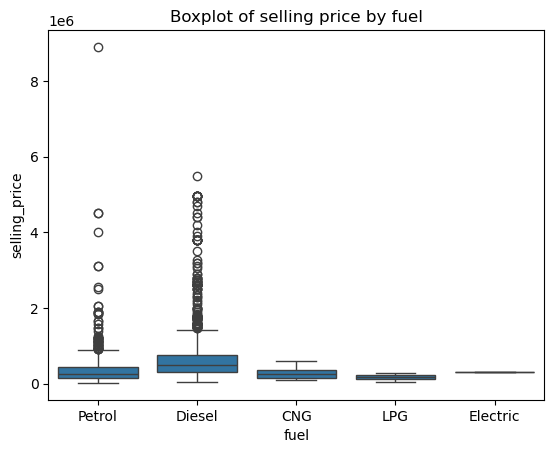

In [22]:
# Boxplot of selling price by fuel
sns.boxplot(x='fuel', y='selling_price', data=cs_cleaned)
plt.title('Boxplot of selling price by fuel')
plt.show()

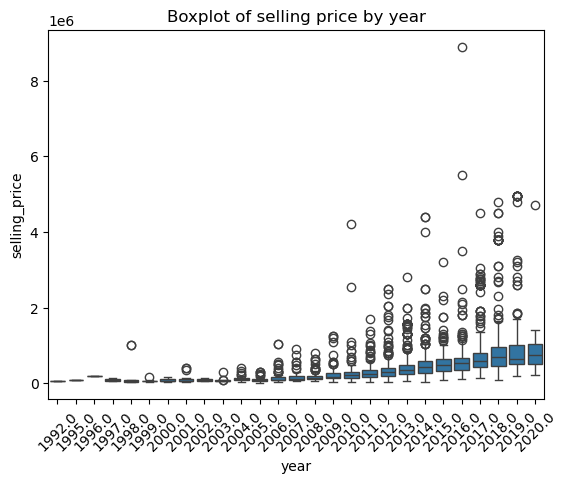

In [23]:
# Boxplot of selling price by year
sns.boxplot(x='year', y='selling_price', data=cs_cleaned)
plt.title('Boxplot of selling price by year')
plt.xticks(rotation=45) 
plt.show()

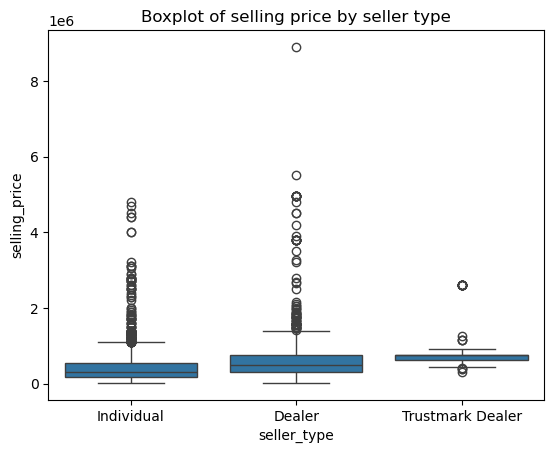

In [24]:
# Boxplot of selling price by seller type
sns.boxplot(x='seller_type', y='selling_price', data=cs_cleaned)
plt.title('Boxplot of selling price by seller type')
plt.show()

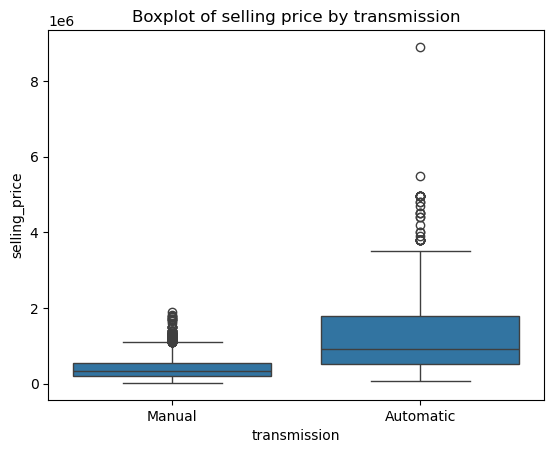

In [25]:
# Boxplot of selling price by transmission
sns.boxplot(x='transmission', y='selling_price', data=cs_cleaned)
plt.title('Boxplot of selling price by transmission')
plt.show()

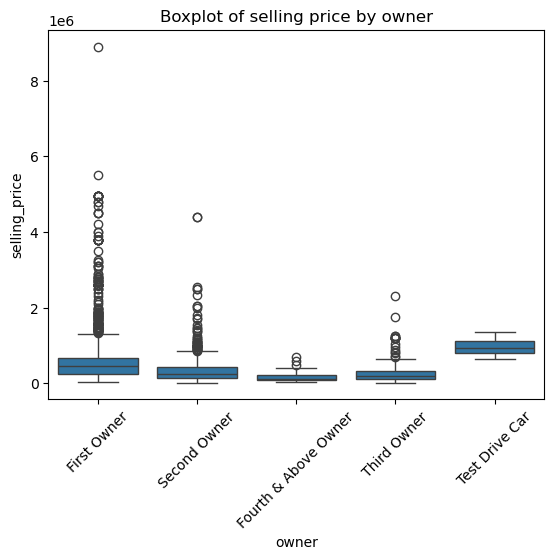

In [26]:
# Boxplot of selling price by owner
sns.boxplot(x='owner', y='selling_price', data=cs_cleaned)
plt.title('Boxplot of selling price by owner')
plt.xticks(rotation=45) 
plt.show()

# Explanation

## Figure 1 Boxplot of selling price by fuel

The first figure shows that the type of fuel has a big impact on how much a car costs to sell, with petrol and diesel cars being more expensive and less reliable than other fuel types.

## Figure 2 Boxplot of selling price by year

The boxplot illustrates how car sales prices have been rising over time. In general, the selling prices of recent model year vehicles are higher than those of older models.

## Figure 3 Boxplot of selling price by seller type

The selling prices of individual sellers and dealers are more unpredictable, with some expensive vehicles producing outliers.
The selling proces of trustmark dealler are more predicted. Because they concentrate on selling standardized or approved vehicles, trusted dealers tend to have more stable prices. 

## Figure 4 Boxplot of selling price by transmission

Manual cars are typically more reasonably priced and have more stable prices, making them an excellent choice for purchasers on a tight budget. In contrast, automatic cars are typically more expensive and exhibit more price fluctuation.

## Figure 5 Boxplot of selling price by owner

Cars with fewer prior owners typically sell for more money, with first-owner automobiles commanding the highest prices. The selling price often declines with the number of prior owners. However, test-drive cars continue to command rather premium prices, probably because of their low mileage and good condition.

## Overall summary
A car's selling price is determined by a number of elements, such as the fuel type, manufacturer's year, seller type, type of transmission, and number of prior owners. First-owner, automatic trensmission, newer cars are typically more expensive and less predictable, especially when they are offered by Trustmark dealers. Contrarily, older, manual, and multi-owner vehicles tend to be more reasonably priced, but due of their high number of outliers, their selling prices vary widely.

## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [90]:
#remove other data
filtered_cs = cs_cleaned[
    (cs_cleaned['owner'].isin(['First Owner', 'Second Owner', 'Third Owner'])) &
    (cs_cleaned['fuel'].isin([ 'Petrol','Diesel'])) &
    (cs_cleaned['seller_type'].isin(['Individual','Dealer']))
]

# Print the length of data
filtered_length = len(filtered_cs)
print("The final length of the data after removing outlier:", filtered_length)

The final length of the data after removing outlier: 3657


In [78]:
filtered_cs.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [92]:
filtered_cs.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner'], dtype=object)

In [94]:
filtered_cs.fuel.unique()

array(['Petrol', 'Diesel'], dtype=object)

In [96]:
filtered_cs.seller_type.unique()

array(['Individual', 'Dealer'], dtype=object)